In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import viz # curriculum viz example code
import pandas as pd

np.random.seed(123)


A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

What is the probability that no cars drive up in the noon hour?
What is the probability that 3 or more cars come through the drive through?
How likely is it that the drive through gets at least 1 car?

<BarContainer object of 10 artists>

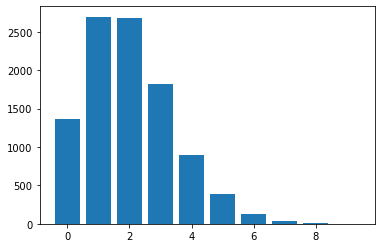

In [60]:
data = pd.Series(stats.poisson(2).rvs(10000))
data.value_counts()
plt.bar(data.value_counts().index,data.value_counts())

In [63]:
#Odds that no cars drive up
stats.poisson(2).pmf(0)

0.1353352832366127

In [69]:
#Odds of 3 or more
stats.poisson(2).sf(2)

0.32332358381693654

In [70]:
#Odds of at least 1 car
stats.poisson(2).sf(0)

0.8646647167633873

Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

What grade point average is required to be in the top 5% of the graduating class?
What GPA constitutes the bottom 15% of the class?
An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
If I have a GPA of 3.5, what percentile am I in?

In [202]:
data = stats.norm(3,.3)

In [79]:
data.ppf(.95)

3.4934560880854417

In [75]:
data.cdf(.15)

1.0494515075362604e-21

In [200]:
# A student with 2.8 gpa would qualify for the third decile scholarship
pd.Series(data.rvs(1000)).describe([.2,.3])

count    1000.000000
mean        3.007626
std         0.300191
min         1.677920
20%         2.766762
30%         2.852277
50%         3.004159
max         3.859836
dtype: float64

In [197]:
data.ppf([.2,.3])

array([2.74751363, 2.84267985])

In [204]:
# 3.5 is in the 95.3 percentile
1 - data.sf(3.5)

0.9522096477271853

A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [207]:
# 4326*.02 = 86.5 which is mu
stats.poisson(86.5).sf(96)

0.141626399458289

You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

What is the probability that at least one of your first 60 answers is correct?

In [208]:
stats.binom(60,.01).sf(0)

0.45284335760923855

The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [100]:
# 66 students * .9 = 59 students visit break area each with a 3% chance of cleaning
stats.binom(59,.03).sf(0)

0.8342199288437352

In [114]:
# Go two days without cleanup
stats.binom(59*2,.03).pmf(0)

0.027483031992576134

In [115]:
# Go 5 days without cleanup
stats.binom(59*5,.03).pmf(0)

0.00012521651388091245

In [123]:
# Odds the breakroom gets cleaned all 5 days
stats.poisson(5,.83).sf(5)

0.5595067149347879

You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [211]:
# Odds that it takes less than 45 min, 10 min to get food, 35 min in line, 16 or less customers
stats.norm(15,3).cdf(16.5)

0.6914624612740131

Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

What percent of employees earn less than 60,000?
What percent of employees earn more than 95,000?
What percent of employees earn between 65,000 and 80,000?
What do the top 5% of employees make?

In [129]:
import pandas as pd
import env
import datetime

url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
query = 'SELECT * FROM employees JOIN salaries USING (emp_no)'
data = pd.read_sql(query, url)


In [141]:
date_before = datetime.date(2016, 1, 19)
data = data[data['to_date']>date_before]
data.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
16,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
22,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
29,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01
45,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01
58,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01


In [143]:
sal_mean = data['salary'].mean()
sal_std = data['salary'].std()

In [154]:
model_dist = pd.Series(stats.norm(sal_mean,sal_std).rvs(10000))

What percent of employees earn less than 60,000? What percent of employees earn more than 95,000? What percent of employees earn between 65,000 and 80,000? What do the top 5% of employees make?

In [158]:
print(f"Real data < $60,000: {round(len(data[data['salary']<60000])/len(data),2)}")
print(f"Simulated data < $60,000: {round((model_dist<60000).sum()/len(model_dist),2)}")

Real data < $60,000: 0.27
Simulated data < $60,000: 0.25


In [159]:
print(f"Real data > $95,000: {round(len(data[data['salary']>95000])/len(data),2)}")
print(f"Simulated data > $95,000: {round((model_dist>95000).sum()/len(model_dist),2)}")

Real data > $95,000: 0.11
Simulated data > $95,000: 0.09


In [177]:
print(f"Real data between $65,000 & $85,000: {round(len(data[data['salary'].between(65000,85000)])/len(data),2)}")
print(f"Simulated data between $65,000 & $85,000: {round(((model_dist>65000) & (model_dist<80000)).sum()/len(model_dist),2)}")

Real data between $65,000 & $85,000: 0.4
Simulated data between $65,000 & $85,000: 0.34


 What do the top 5% of employees make?


In [193]:
data['salary'].describe([.95])['95%']

104225.84999999998

In [194]:
stats.norm(sal_mean,sal_std).ppf(.95)

100484.64454102775